# Hare and Lynx Example

### Adapted from [Dr. Kantor's Notes](https://github.com/jckantor/CBE30338/blob/master/notebooks/HareLynx/Hare%20and%20Lynx%20Population%20Dynamics.ipynb) 

## Introduction

We'd like to model the number of Hares and Lynx in a certain population of animals. 
![](http://boredomtherapy.com/wp-content/uploads/2015/12/14-canadian-lynx-paws-cute.jpg)
![](http://www.cbc.ca/kidscbc2/content/contests/cute_snowshoe1.jpg)

As cute as that Lynx is, it will prey on the Hare to the exclusion of all other animals if possible. This means the population levels of the Lynx and Hare are intrinsically related, see the pelt trading data for the Hudson's Bay Company:

![](https://archive.math.arizona.edu/maw1999/population/graphics/pelts.gif)


### Modeling

We can start with the basic equation of: change = in - out

$$
\frac{dH}{dt} = (Hare Birth Rate) - (Hare Death Rate) \\
\frac{dL}{dt} = (Lynx Birth Rate) - (Lynx Death Rate)
$$


#### Relevant Parameters

| Parameter | Symbol | Value |
| - | :----: | :---: |
| Lynx/Hare Predation Rate | $a$ | 3.2 |
| Lynx/Hare Conversion | $b$ | 0.6 |
| Lynx/Hare Michaelis Constant| $c$ | 50 |
| Lynx Death Rate | $d$ | 0.56 |
| Hare Carrying Capacity| $k$ | 125 |
| Hare Reproduction Rate | $r$ | 1.6 |

#### Model Equations
These parameters can be used to form a model:

$$
\frac{dH}{dt} = rH(1 - \frac{H}{k}) - \frac{aHL}{c + H}  \\
\frac{dL}{dt} = a \frac{bHL}{c + H} - d*L
$$

The focus of this tutorial is not on the development of these model equations, but do review the equations and try to make sense of them. It can help you in debugging steps later should you have an error.

### Programming and Plotting

#### Step 1: Initialization

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


#### Step 2: Default Parameter Values

In [0]:
a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6

#### Step 3: Define the differential equations

In [0]:
def hare_lynx(x, t):
  H, L = x
  dH = r*H*(1 - H/k) - a*H*L/(c + H)
  dL = a*b*H*L/(c + H) - d*L
  return [dH, dL]

#### Step 4: Integrate Differential Equations

Text(0.5, 1.0, 'Hare/Lynx Population Dynamics')

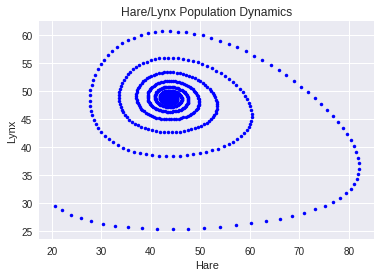

In [57]:
a = 2

t = np.linspace(0, 1000, 7001)
IC = [20.588, 29.481]
soln = odeint(hare_lynx, IC, t)
H = soln[:, 0]
L = soln[:, 1]

plt.plot(H, L, 'b.')
plt.xlabel('Hare')
plt.ylabel('Lynx')
plt.title('Hare/Lynx Population Dynamics')

#### Step 5: Plot 

Text(0, 0.5, 'Population Density')

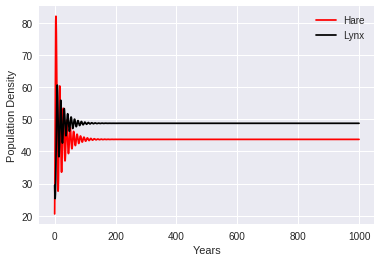

In [58]:
plt.plot(t, H, 'r')
plt.plot(t, L, 'k')
plt.legend(['Hare', 'Lynx'])
plt.xlabel('Years')
plt.ylabel('Population Density')

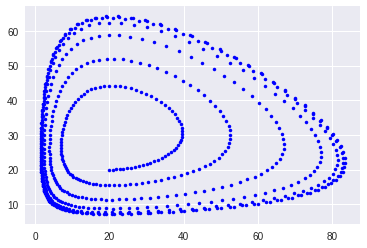

In [33]:
plt.plot(H, L, 'b.')
